In [3]:
import datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyedflib
from tqdm import tqdm

import sys
sys.path.append('../src')

from data_preprocessing import preprocess_dataset

%load_ext autoreload
%autoreload 2

In [4]:
# obtain preprocessed data
db_folder="../data/physionet.org/files/ucddb/1.0.0"
raw_data, dfs, constants = preprocess_dataset(db_folder)

# unpack the data
raw_records, raw_respevents = raw_data
sample_rate, n_signals = constants
subject_details, respevents, signal_headers_table = dfs


104it [00:26,  3.99it/s]


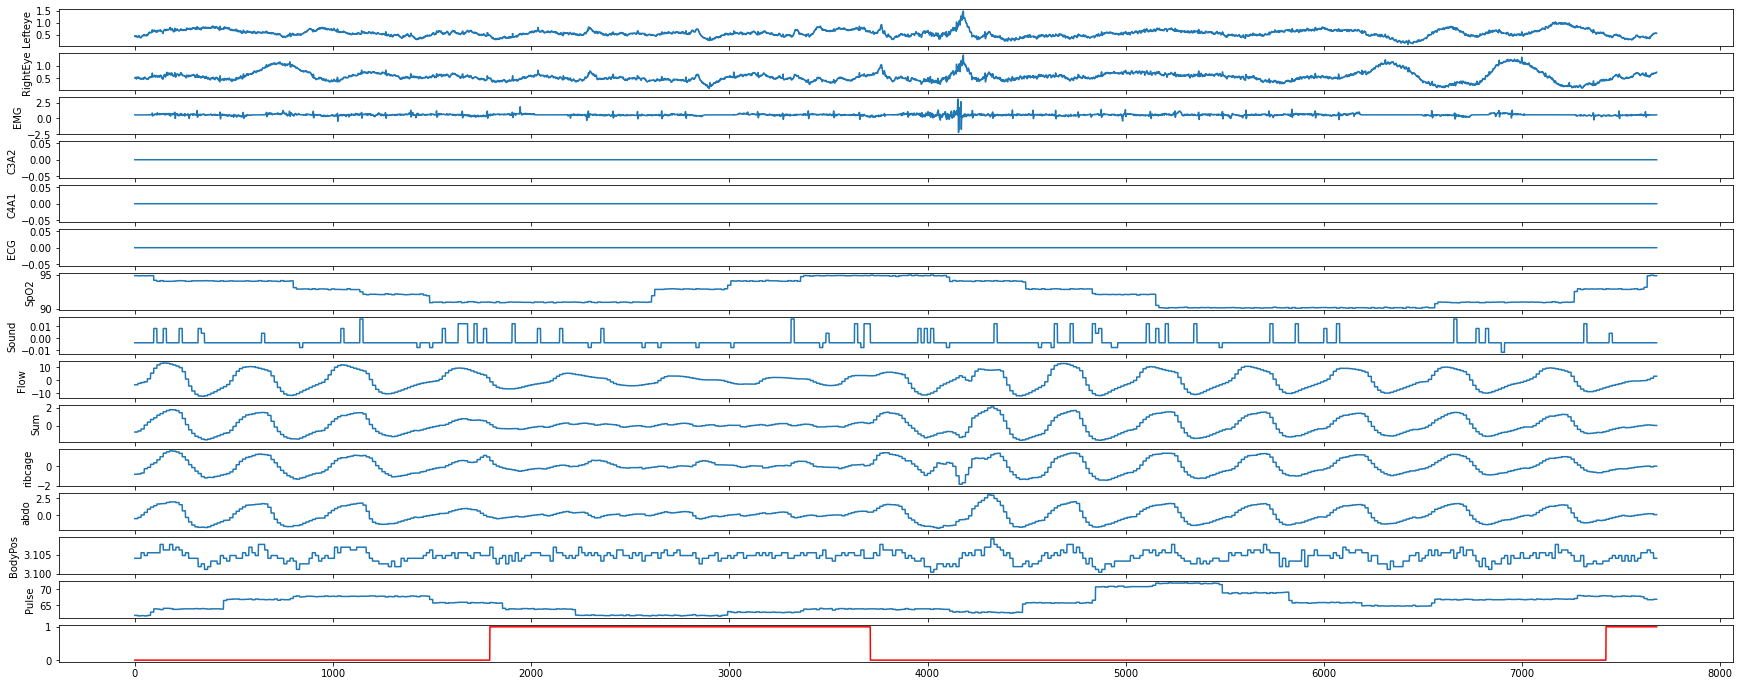

In [6]:
# Here is an example on how to visualize the different signals during this 
# obstructive apnea (the last line is the label binary signal, the others are input signals for your model)

i = 0

onset = int(datetime.timedelta(hours=1, minutes=29, seconds=30).total_seconds()*sample_rate)
offset = int(onset+60*sample_rate)

fig, axes = plt.subplots(nrows = n_signals+1, sharex=True, figsize=(30,12))
for n, (ax, label) in enumerate(zip(axes[:-1], signal_headers_table["label"].to_list())):
    ax.plot(raw_records[i,onset:offset,n])
    ax.set_ylabel(label)
axes[-1].plot(raw_respevents[i, onset:offset], "r")

In [7]:
subject_details

,S/No,Study Number,Height (cm),Weight (kg),Gender,PSG Start Time,PSG AHI,BMI,Age,Epworth Sleepiness Score,Study Duration (hr),Sleep Efficiency (%),Unnamed: 12,No of data blocks in EDF
0,1,UCDDB002,172,100.3,M,0:11:04,23,33.9,54,16,6.2,84,NaN,22470
1,2,UCDDB003,179,102.0,M,23:07:50,51,31.8,48,13,7.3,81,NaN,26478
2,3,UCDDB005,176,100.4,M,23:28:42,13,32.4,65,19,6.9,63,NaN,24798
3,4,UCDDB006,185,103.5,M,23:57:14,31,30.2,52,3,6.7,89,NaN,24267
4,5,UCDDB007,183,84.0,M,23:30:22,12,25.1,47,15,6.8,90,NaN,24405
5,6,UCDDB008,145,59.8,F,23:29:11,5,28.4,63,1,6.4,64,NaN,23041
6,7,UCDDB009,180,101.5,M,22:35:22,12,31.3,52,19,7.7,80,NaN,27759
7,8,UCDDB010,174,119.0,M,22:51:18,34,39.3,38,2,7.6,92,NaN,27211
8,9,UCDDB011,188,101.0,M,22:47:38,8,28.6,51,8,7.5,60,NaN,27030
9,10,UCDDB012,179,97.5,M,23:23:21,25,30.4,51,16,7.2,85,NaN,25941
